# 2 - Preparación de datos y herramientas

**Sumario**

1. Introducción
2. Información de entrada
3. Información de salida
4. Información de entrenamiento

## 2.1 - Introducción

El proceso de construcción de modelos de comportamiento basados en algoritmos de aprendizaje automático implica utilizar información que sea capaz de describir, de manera directa o indirecta, el comportamiento que queremos aprender. Es decir, si queremos construir un modelo de comportamiento que permita predecir, por ejemplo, el precio de una vivienda, deberíamos disponer de información descriptiva referida a las viviendas y a los precios a los que estas han sido vendidas.

Distinguimos tres tipos de información:

* **Información de entrada**. Información que será utilizada para construir el modelo mediante un algoritmo de aprendizaje. Normalmente, esta información ha de ser preprocesada, limpiada y transformada con el objetivo de prepararla para el proceso de entrenamiento.

* **Información de salida**. Información que se corresponde con el etiquetado (clase) de la información de entrada. Esta información es opcional, ya que en muchos caso no está disponible o o puede no utilizarse según la naturaleza del algoritmo de aprendizaje. Así, por ejemplo, la información de salida no es necesaria si usamos un algoritmo de aprendizaje no supervisado.

* **Información de entrenamiento**. Información que se corresponde con los tres elementos básicos del proceso de entrenamiento:
    * El **algoritmo de aprendizaje** que será utilizado 
    * El **algoritmo de optimización** que será utilizado con la funión de pérdida (*loss*)
    * **La función de pérdida (*loss*)** que será utilizada para medir la calidad del modelo durante el entrenamiento
    
<img src="images_2/tipos_de_informacion.png" width="600" data-align="center">

## 2.2 - Información de entrada

A la hora de definir la información de entrada, consideraremos que los datos se encuentran representados mediante **instancias formadas por atributos**.

Los **atributos** son las unidades básicas e indivisibles de información utilizadas para representar algún tipo de conocimiento específico sobre cada instancia. Este tipo de información representa una **característica básica y atómica** que intenta describir algún tipo de **rasgo sobre los datos** (color, tamaño, distancia, etc.). Los atributos suelen clasificarse en dos categorías en base a los valores que pueden adoptar:

* **Continuos**. Aquellos atributos que adoptan un valor fijo dentro de un **intervalo no finito perfectamente acotado** donde, dados dos valores observables, siempre existe un tercer valor intermedio que podría adoptar el atributo continuo. Por ejemplo, la temperatura media de una habitación
* **Discretos**. Aquellos atributos que adoptan su valor entre los elementos que forman un conjunto finito. Por ejemplo, los colores disponibles para pintar un vehiculo (rojo, azul, amarillo, etc.)

**Cada secuencia finita de atributos se agrupa en una instancia**, que es la estructura de información básica utilizada para representar cada uno de los ejemplos que conforman los conjuntos de datos que serán utilizados en el proceso de aprendizaje. **Las instancias de un mismo conjunto han de estar formadas por el mismo tipo de atributos**.

<img src="images_2/datos_entrada.png" width="600" data-align="center">

A la hora de utilizar conjuntos de datos es necesario analaizar la informacion contenida con el objetivo de asgurar dos propiedades fundamentales:
* **Calidad de la información.** ¿Contienen las instancias la información necesaria para aprender la tarea objetivo?
* **Cantidad de la información.** ¿Tenemos suficientes instancias para aprender la tarea objetivo?

In [1]:
import numpy as np
import pandas as pd

# automobile_nomissing = pd.read_csv("https://raw.githubusercontent.com/ferjorosa/telefonica-talentum-ai-10-2020/main/Data/automobile_nomissing.csv")
automobile = pd.read_csv("https://raw.githubusercontent.com/ferjorosa/telefonica-talentum-ai-10-2020/main/Data/automobile.csv")
automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### 2.2.1 - Calidad de la información

Como ya hemos mencionado, se trata de uno de los principales elementos que debemos tener en cuenta a la hora de construir un modelo. A la hora de utilizar un conjunto de datos, hay que analizar ciertos aspectos relacionados con ellos.

#### Valores atípicos
Los valores atípicos u outliers son valores que pueden adoptar los atributos y que resultan muy distantes con respecto a los valores que poseen el resto de instancias del conjunto. Estos valores pueden significar que se ha producido un error en la medición o que se ha detectado un caso inusual que no suele reproducirse.

Normalmente estos valores suelen ser eliminados, aunque hay que ser cuidadoso de no eliminar información relevante para el modelo. Algunos de los métodos más utilizados para la detección de estos valores son:

1. Métodos monovariables. Buscan valores atípicos de forma individual en cada atributo (con el fin de eliminarlos).
2. Métodos multivariables. Bsucan valores atípicos teniendo en consideración multiples atributos (con el fin de eliminarlos).
3. Método de error de Minkowski. A diferencia de los dos anteriores, no intenta eliminar los valores atípicos sino que los ranquea utilizando una variante del error cuadrático que se ve menos afectada por los valores atípicos. La principal diferencia es la introducción del parametro de Minkowski, que sustituye al cuadrado:

$$
\text{error_cuadratico} = \frac{\sum(\text{outputs} - \text{targets})^{2}}{\text{n_instancias}}
$$

$$
\text{error_miknowski} = \frac{\sum(\text{outputs} - \text{targets})^{\text{parametro_minkowski}}}{\text{n_instancias}}
$$

Un valor típico del parámetro de Minkowski es $1.5$. Por ejemplo, si un valor atípico tiene un error de 10, el error cuadrático para esa instancia es $10^{2}=100$, mientras que el error de Minkowski es $10^{1.5}=31.62$.

#### Uniformidad
Algunos ejemplos típicos de falta de uniformidad son:

* **Unidades de medición diferentes**. En muchos casos, a la hora de combinar información de diversas fuentes, nos podemos encontrar con que la información ha sido expresada en diferentes unidades métricas; así, por ejemplo, la altura de una persona se puede expresar en centímetros o en metros. Por tanto, es importante elegir el tipo de unidad de medida que se va a utilizar y aplicar las correspondientes transformaciones.

* **Falta de información**. En ciertos casos, algunos atributos carecen de valor dado que el sistema de extracción de información permite a los usuarios y a las usuarias no introducir un valor o bien existe un error en dicho proceso de extracción. Por tanto, es necesario decidir si esas instancias son eliminadas, si el atributo es ignorado, o si utilizamos algún método de estimación de valores missing.

* **Precisión en las mediciones**. En ciertos casos, el sensor con el que obtenemos las mediciones puede deteriorarse y con ello la calidad de los datos. Es importante tener esto en cuenta antes de aprender un modelo, no sea que consideremos datos no-reales por culpa del sensor en cuestión.

#### Ruido
El ruido es el conjunto de valores de un atributo específico que no aportan ningún tipo de información al proceso de aprendizaje y que pueden haber sido introducidos mediante un proceso de medición incorrecto (ruido de muestreo) o a causa de un error en la inserción de los datos.

Generalmente, el ruido presenta numerosas desventajas a la hora de construir un modelo, ya que tiende a aumentar la complejidad de los datos dificultando la ejecución de los algoritmos (i.e., le cuesta más esfuerzo al modelo encontrar los patrones "verdaderos").

<img src="images_2/ruido.png" width="500" data-align="center">

### 2.2.2 - Cantidad de la información

La falta de información puede hacer que el algoritmo de aprendizaje sea incapaz de construir un modelo que represente los patrones esperados. En base a esto, distinguimos dos tipos de problemas relacionados con la falta de información:

* **Falta de información global**, cuando tenemos muy poca información o todos los ejemplos son muy similares, dando lugar a un modelo que no es capaz de aprender.
* **Falta de información parcial**, cuando tenemos información no equilibrada entre las posibles salidas del modelo que queremos construir. Por ejemplo, si queremos construir un modelo que prediga los diferentes estados de la actividad física de una persona y tenemos para ello un conjunto de 5000 instancias distribuidos de la siguiente forma:
    1. 1700 ejemplos para `andar`
    2. 300 ejemplos para `correr ligeramente`
    3. 2800 ejemplos para `correr intensamente`
    4. 200 ejemplos para `quedarse quieto`
    
    Hay pocos ejemplos de `correr ligeramente` y `quedarse quieto`, lo cual puede producr que el modelo no sea capaz de predecir estos estados de forma confiable.

#### Aumentación

El proceso de aumentación de datos (*Data Augmentation*) consiste en **generar información artificial válida mediante la aplicación de sampleo o transformaciones simples** con el objetivo de aumentar el número de ejemplos disponibles en el conjunto de entrada. Esta técnica es muy útil cuando esos pequeños cambios no suponen una introducción de errores en el conjunto de datos.

Por ejemplo, si nuestro conjunto de datos es una imagen, el proceso de aumentación de datos podría generar nuevas aplicando pequeñas transformaciones sobre la imagen general.

### 2.2.3 - Preparación de datos

El proceso de preparación de datos consiste en analizar y procesar un conjunto de datos con el objetivo de **limpiarlos**, **enriquecerlos**, y **generar los diferentes conjuntos necesarios para la fase de entrenamiento**.

In [2]:
df_breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header=None)
df_breast_cancer.columns = ["col_" + str(i) for i in df_breast_cancer.columns]

#### Exploración de datos

Antes de realizar el proceso de entrenamiento, es conviente realizar una exploración de los mismos. La libreria Pandas contiene multiples funciones y atributos que nos pueden ayudar en esta exploración.

Para un pequeño recordatorio de las principales funciones de Pandas, [W3 provee de un buen tutorial](https://www.w3schools.com/python/pandas/default.asp)

##### `head()`

In [3]:
df_breast_cancer.head(5)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


##### `dtypes`

Los principales tipos almacenados en los objetos `DataFrame` de Pandas son `object`, `float`, `int`, `bool` y `datetime64`. Podemos mostrar los tipos

In [4]:
df_breast_cancer.dtypes

col_0      int64
col_1      int64
col_2      int64
col_3      int64
col_4      int64
col_5      int64
col_6     object
col_7      int64
col_8      int64
col_9      int64
col_10     int64
dtype: object

In [5]:
# df_breast_cancer["col_6"].astype(int) # No podemos cambiar el tipo de datos de esta columna a "int" porque contiene caracteres "?"

##### `describe()`

In [6]:
df_breast_cancer.describe() # Ignora la columna "col_6" porque no es de tipo int/float

,col_0,col_1,col_2,col_3,col_4,col_5,col_7,col_8,col_9,col_10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


##### `value_counts()`

In [7]:
df_breast_cancer["col_0"].value_counts()

1182404    6
1276091    5
1198641    3
897471     2
1116192    2
          ..
1232225    1
1236043    1
1241232    1
1241559    1
814265     1
Name: col_0, Length: 645, dtype: int64

##### **Valores missing**

In [8]:
# replace "?" to NaN
df_breast_cancer.replace("?", np.nan, inplace = True)

Los valores "?" se convierten a los valores missing predeterminados de Python. Ahora podemos usar las funciones integradas de Python para identificar estos valores missing:

* `.isnull()`. Indica con True/False 

Podemos contar el numero de missings en cada columna con una list-comprehension:

In [9]:
missing_data = df_breast_cancer.isnull()
missing_counts = [(column, missing_data[column].values.sum()) for column in missing_data.columns]
missing_counts.sort(key=lambda x:x[1], reverse = True)
missing_counts

[('col_6', 16),
 ('col_0', 0),
 ('col_1', 0),
 ('col_2', 0),
 ('col_3', 0),
 ('col_4', 0),
 ('col_5', 0),
 ('col_7', 0),
 ('col_8', 0),
 ('col_9', 0),
 ('col_10', 0)]

#### Análisis de correlaciones

La correlación es una medida de dependencia estadística. En la literatura de Machine Learning, se suele referir al coeficiente de correlación de Pearson $\rho$, el cual mide la dependencia lineal existente entre dos variables. Tiene un valor entre $+1$ y $-1$, donde $1$ significa una correlación positiva máxima. $0$ indica que no existe correlación, y $-1$ significa que existe una correlación negativa máxima. Es una medida simétrica. Dado un par de variables aleatorias $\displaystyle (X,Y)$, su correlación de Pearson $\rho_{X,Y}$ es

$$ \rho_{X,Y} = \rho_{Y,X} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}},$$ 

donde la estimación de $cov(X,Y)$ se realiza mediante la siguiente formula:

$$ cov(X,Y) = \frac{1}{m-1} \sum_{i}^{m} (x_{i} - \bar{x})(y_{i} - \bar{y})$$

----

**Correlación e independencia estadística:** Si las variables son estadísticamente independientes su coefiente de correlacción de Pearson es 0. Sin embargo, lo opuesto no tiene porque ser verdad ya que el coeficiente de correlacción solo detecta dependencias **lineal** entre variables.

<img src="images_2/correlaccion_dependencia.png" width="600" data-align="center">

----

In [10]:
print(df_breast_cancer[["col_2", "col_3"]].corr())
print(df_breast_cancer[["col_2", "col_4"]].corr())

          col_2     col_3
col_2  1.000000  0.906882
col_3  0.906882  1.000000
          col_2     col_4
col_2  1.000000  0.705582
col_4  0.705582  1.000000


<AxesSubplot:>

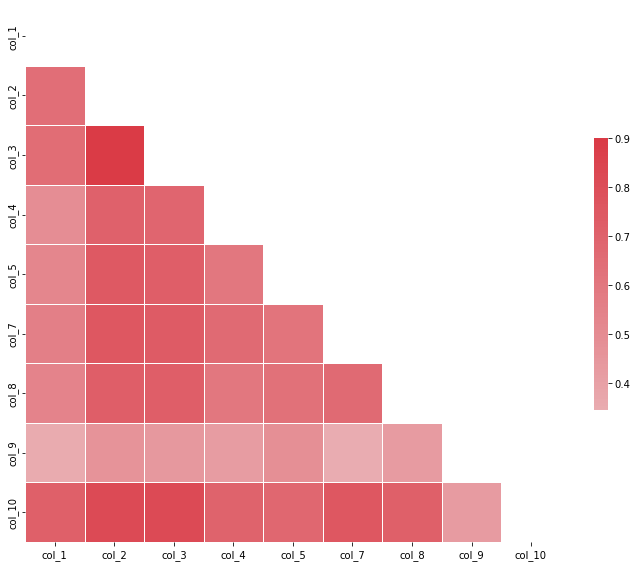

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoramos la columna 0 porque actua como un ID
df = df_breast_cancer.drop(["col_0"], axis=1)

# Generamos la matriz de correlacción
corr = df.corr()

# Generamos una máscara con Numpy que ignora la triangular superior (ya que es simétrica) y la diagonal
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Preparamos la figura de Matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Generamos un colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujamos el heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Normalización de valores

Otro de los problemas a los que nos enfrentaremos cuando trabajemos con valores es la escala en la que estos están representados. En algunas ocasiones, los valores presentan una escala demasiado grande, lo que supone que existen diferencias considerables entre unos y otros. Normalmente, esto puede suponer un problema para los algoritmos de ML, que **no son capaces de extraer patrones correctamente debido a las grandes diferencias producidas por la escala**.

Existen diferentes maneras de normalizar los datos, pero las más comunes son:

* **Normalización estándar**. Transforma los valores a una escala $[0,1]$ sin tener en cuenta el valor mínimo. se suele aplicar para transformar los valores de los píxeles de las imágenes,
que se representan con valores de entre 0 y 255 y no necesitan normalizarse en base al valor mínimo.

$$
x_{i}' = \frac{x_{i}}{\text{max}(x)}
$$

In [12]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

original_col_data = df_breast_cancer[["col_1"]]
scaled_col_data = scaler.fit_transform(df_breast_cancer[["col_1"]])
scaled_col_data = pd.DataFrame(scaled_col_data, columns=["scaled_col_1"])

# Combinamos ambos conjuntos de datos
pd.concat([original_col_data, scaled_col_data], axis=1).head(5)

,col_1,scaled_col_1
0,5,0.5
1,5,0.5
2,3,0.3
3,6,0.6
4,4,0.4


* **Normalización min-max**.Transforma los valores a una escala $[0,1]$ teniendo en cuenta el valor mínimo. Suele utilizarse con datos tabulares en los que se queire mantener forma de la distribución.

$$
x_{i}' = \frac{x_{i} - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

original_col_data = df_breast_cancer[["col_1"]]
scaled_col_data = scaler.fit_transform(df_breast_cancer[["col_1"]])
scaled_col_data = pd.DataFrame(scaled_col_data, columns=["scaled_col_1"])

# Combinamos ambos conjuntos de datos
pd.concat([original_col_data, scaled_col_data], axis=1).head(5)

,col_1,scaled_col_1
0,5,0.444444
1,5,0.444444
2,3,0.222222
3,6,0.555556
4,4,0.333333


* **Normalización z-score**. Transforma los valores en base a su distribución normal. Se utiliza comunmente con PCA, regresiones lineales, redes neuronales, etc.

$$
x_{i}' = \frac{x_{i} - \mu}{\sigma}
$$

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

original_col_data = df_breast_cancer[["col_1"]]
scaled_col_data = scaler.fit_transform(df_breast_cancer[["col_1"]])
scaled_col_data = pd.DataFrame(scaled_col_data, columns=["scaled_col_1"])

# Combinamos ambos conjuntos de datos
pd.concat([original_col_data, scaled_col_data], axis=1).head(5)

,col_1,scaled_col_1
0,5,0.206936
1,5,0.206936
2,3,-0.503866
3,6,0.562336
4,4,-0.148465


#### Transformaciones sobre atributos categóricos

Uno de los principales problemas que surgen a la hora de preparar nuestros conjuntos de datos para el proceso de entrenamiento es la definición de atributos que contienen texto o se refieren a valores categorizados, ya que la mayoría de los algoritmos de ML trabajan únicamente con valores numéricos o se comportan mejor con ellos.

Existen múltiples opciones a la hora de trabajar con estos atributos. La más común es la **codificación mediante etiquetas numéricas**, que permite transformar los valores alfanuméricos en valores numéricos mediante una codificación 1 a 1. Por ejemplo, si tuviésemos que transformar un atributo con tres valores (aéreo, marítimo y terrestre) realizaríamos una transformación 1 a 1 donde cada uno de los valores adoptaría un valor numérico comenzando por el cero (aéreo = 0, marítimo = 1 y terrestre = 2).

**Este acercamiento se suele utilizar para etiquetas de clasificación donde tenemos que representar numéricamente dicha variable ya que el método de aprendizaje así lo requiere (e.g., redes neuronales)**

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

label = df_breast_cancer["col_10"]
label_encoded = encoder.fit_transform(label)

# Mostramos los primers 10 valores como ejemplo
print(label[:10].to_list())
print(label_encoded[:10])

[2, 2, 2, 2, 2, 4, 2, 2, 2, 2]
[0 0 0 0 0 1 0 0 0 0]


La **codificación one-hot** se utiliza en aquellos casos donde queremos utilizar **un atributo categórico como input para nuestro algoritmo de aprendizaje** (e.g., si tenemos una variable categorica con pocos estados que queremos utilizar en una regresión lineal o en una red neuronal).

Así, el atributo se transforma en un vector de valores binarios cuya longitud viene definida por el numero de posibles valores del atributo y donde solo uno de los elementos presentará el valor 1.

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
label = df_breast_cancer["col_1"]
label_1hot = encoder.fit_transform(label.values.reshape(-1, 1))
print(label_1hot.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Conjuntos de información

La información suele dividirse en tres conjuntos independientes con el objetivo de construir un modelo de mejor calidad:

* **Conjunto de entrenamiento.** Suele contener entre el 80% y el 90% de los datos. Proporciona la **información de entrenamiento** que será utilizada para generar el modelo.
* **Conjunto de validación.** Suele contener entre el 5% y el 10% de los datos. Se usa para efecturar una **evaluación parcial** del modelo durante la fase de aprenziaje. Por ejemplo, para escoger los hiperparametros del algoritmo.
* **Conjunto de test.** Suele contener entre el 5% y el 10% de los datos. Se usa para efectuar una **evaluación imparcial** del modelo generado tras el proceso de aprendizaje. Por ejemplo, para comparar diferentes modelos (una vez hemos escogido los hiperparametros deseados).

In [17]:
from sklearn.model_selection import train_test_split

test_proportion = 0.05
val_proportion = 0.05
n_test = int(df_breast_cancer.shape[0] * test_proportion)
n_val = int(df_breast_cancer.shape[0] * val_proportion)

df_train, df_test = train_test_split(df_breast_cancer, test_size=n_test, random_state=0)
df_train, df_val = train_test_split(df_train, test_size=n_val, random_state=0)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(631, 11)
(34, 11)
(34, 11)


Uno de los grandes problemas que suelen surgir a la hora de construir los conjuntos de datos para el proceso de entrenamiento está relacionado con el **algoritmo de muestreo** utilizado. Existen diferentes algoritmos de muestreo, siendo los más utilizados:

* **Muestreo aleatorio**. Este tipo muestreo es una buena forma de distribuir la información en conjuntos de tamaño muy elevado, y en problemas de clasificación balancedos
* **Muestreo estratificado**. Este tipo de muestreo intentar distribuir los datos de tal forma que **se mantenga la distribución de una o varias columnas** (e.g., la distribución de valores de la clase)

In [18]:
# Distribución de valores tras un split con muestreo aleatorio
print(df_breast_cancer["col_10"].value_counts()/df_breast_cancer.shape[0]*100)
print(df_train["col_10"].value_counts()/df_train.shape[0]*100)
print(df_val["col_10"].value_counts()/df_val.shape[0]*100)
print(df_test["col_10"].value_counts()/df_test.shape[0]*100)

2    65.522175
4    34.477825
Name: col_10, dtype: float64
2    65.9271
4    34.0729
Name: col_10, dtype: float64
2    61.764706
4    38.235294
Name: col_10, dtype: float64
2    61.764706
4    38.235294
Name: col_10, dtype: float64


In [19]:
df_train_stratified, df_test_stratified = train_test_split(df_breast_cancer, test_size=n_test, random_state=0, stratify=df_breast_cancer["col_10"])
df_train_stratified, df_val_stratified = train_test_split(df_train_stratified, test_size=n_val, random_state=0, stratify=df_train_stratified["col_10"])

# Distribución de valores tras un split con muestreo aleatorio
print(df_breast_cancer["col_10"].value_counts()/df_breast_cancer.shape[0]*100)
print(df_train_stratified["col_10"].value_counts()/df_train_stratified.shape[0]*100)
print(df_val_stratified["col_10"].value_counts()/df_val_stratified.shape[0]*100)
print(df_test_stratified["col_10"].value_counts()/df_test_stratified.shape[0]*100)

2    65.522175
4    34.477825
Name: col_10, dtype: float64
2    65.610143
4    34.389857
Name: col_10, dtype: float64
2    64.705882
4    35.294118
Name: col_10, dtype: float64
2    64.705882
4    35.294118
Name: col_10, dtype: float64


Si bien las diferencias en este caso no son muy grandes, en aquellos casos donde la variable de referencia tiene muchos valores diferentes, la estratificación nos ofrece grandes beneficios, ya que un mal muestreo haria que ciertas clases pudieran ni aparecer en el conjunto de datos de entrenamiento.

## 2.3 - Información de salida

En caso de que estemos utilizando un algoritmo supervisado, la información de salida es la que se utiliza para etqieutar las instancias del conjutno de datos. Esta información es muy util ya que nos permite conocer la calidad del modelo de apredizaje tanto durante la fase de entrenamiento como al final de ella.

### 2.3.1 - Función de pérdida (*loss*)

La función de pérdida (*loss*) es una función matemática que permite analizar las diferencias entre los valores generados por el modelo y los valores reales. Por tanto, permite medir el estado del modelo a lo largo del proceso de entrenamiento con el objetivo de modificarlo y mejorarlo. Estas modificaciones se calculan mediante un **algoritmo de optimización** que se aplicará sobre los datos de entrenamiento a lo largo de esta fase.

Existen diferentes funciones de pérdida que suelen ser seleccionadas en base a dos factores:
1. El tipo de algoritmo de Machine Learning
2. El tipo de salida esperada

<table>
    <tr>
        <th>Algoritmo</th>
        <th>Tipo de salida</th>
        <th>Función de pérdida</th>
    </tr>
    <tr>
        <td>Clasificación</td>
        <td>Binaria</td>
        <td>Binary cross entropy</td>
    </tr>
    <tr>
        <td>Clasificación</td>
        <td>Múltiples clases (una única etiqueta)</td>
        <td>Categorical cross entropy</td>
    </tr>
    <tr>
        <td>Clasificación</td>
        <td>Múltiples clases (múltiples etiquetas)</td>
        <td>Binary cross entropy</td>
    </tr>
    <tr>
        <td>Regresión</td>
        <td>Numérica</td>
        <td>Mean Squared Error (MSE)</td>
    </tr>
</table>

## 2.4 - Información de entrenamiento

Consideramos cuatro elementos básicos relacionados con la información de aprendizaje:

* **Coeficientes o paramétros**. Son variables del modelo que se suelen inicializar de manera aleatoria al comienzo de la fase de aprendizaje y cuyo valor va modificándose en cada iteración con el objetivo de minimizar el valor obtenido por la función de pérdida.

* **Número de iteraciones**. Define cuántas veces se aplicará el proceso de optimización. 

* **Tasa de aprendizaje**. Se trata de un número decimal con valores situados entre $0$ y $1$ que nos permite definir el grado de importancia del proces de aprendizaje. Un valor cercano a $0$ abogará por un aprendizaje más "lento" mientras que un valor cercano a $1$ abogará por un aprendizaje más "rápido".

* **Algoritmo de optimización**. Es el que se utiliza durante cada una de las iteraciones del proceso de entrenamiento con el objetivo de optimizar los valores asignados a las variables del modelo. Los más comunes son el **descenso por gradiente** y el **algoritmo de Adams**.

### 2.4.1 - Algoritmos de optimización

Los algoritmos de optimización permiten calcular el valor mínimo de una función. Por ejemplo, dada la función $f(x) = x^{2} - 2$, cuya solución es $x = \sqrt{2}$, el objetivo del algoritmo de optimización consistirá en hallar el valor más cercado a $x$ que hace que la función sea $0$.

<table>
    <tr>
        <th>Función $f(x)$</th>
        <th>Evolución de $x$</th>
    </tr>
    <tr>
        <td><img src="images_2/funcion_x.png" width="400" data-align="center"></td>
        <td><img src="images_2/evolucion_x.png" width="400" data-align="center"></td>
    </tr>
</table>

Normalmente, el proceso de optimización es mucho más complejo, ya que el número de coeficientes que se han de optimizar es muy elevado.

#### Algoritmo del gradiente descendente

El algoritmo del gradiente descendente permite converger haia el valor mínimo de una función mediante un **proceso iterativo**. En Machine Learning se utiliza generalmente con la finalidad de **minimizar el valor de la función de perdida** empleada para medir la calidad del modelo de aprendizaje.

Este algoritmo se basa en el proceso tradicional de búsqueda de mínimos y máximos mediante el uso de la **primera derivada de tipo parcial con respecto a cada uno de los coeficientes** de la función o funciones que describen el modelo en el punto de evaluación.

La derivada no es más que otra función que nos calcula **"como de rápido cambia" la función para ese valor**. Por ejemplo, la derivada de una función cuadrática en el valor $3$ nos dice cuán rapido cambia dicha función en el valor $3$. **Mediante la derivada, se obtiene el valor y el sentido donde se sitúa el mínimo más proximo**, pero no nos dice la naturaleza del mismo. Es decir, **no sabemos si el mínimo es local o global**.

[**Para más información teórica acerca del algoritmo del gradiente descente, recomiendo leer este artículo**](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)

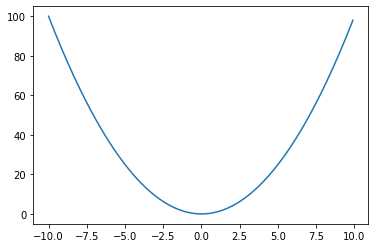

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
y = x**2
plt.plot(x,y)
plt.show()

El valor de la tasa de aprendizaje es muy importante a la hora de aplicar el proceso de optimización, ya que puede dar lugar a posibles estancamientos. 
* Un valor muy bajo podría provocar que el proceso de optimización resulte muy lento y nunca llegue a un mínimo
* Un valor muy alto podría aplicar variaciones demasiado elevadas, lo que produciria que el proceso de optimización no fuera capaz de encontrar ningún mínimo.

Con el objetivo de evitar estros problemas se han realizado diferentes versiones de este algoritmo:
* **Gradiente descendente en batches.** Versión tradicional del algoritmo. Consiste en utilizar todos los valores del conjunto de entrenamiento para calcular los gradientes en cada iteración. Funciona muy bien en situaciones donde el número de coeficientes es bajo (e.g., una regresión lineal). Sin embargo suele generar problemas de estancamiento en modelos más complejos (e.g., redes neuronales).
* **Gradiente descendente estocástico.** Esta versión considera una única instancia aleatoria para calcular el gradiente. Permite explorar más el "espacio" de la función pero suele producir problemas de convergencia.
* **Gradiente descendente (estocástico) en minibatches.** Combinación de ambos algoritmos que utiliza un batch aleatorio de instancias de tamaño aceptable en cada iteración. Busca el termino medio entre "exploración" y "convergencia"

#### Algoritmo de gradiente descendente con momento (inercia)

Las diferentes versiones del algoritmo del gradiente descendente intentan paliar dos de los grandes problemas que ofrece este algoritmo:
1. El tiempo de convergencia.
2. La posibilidad de estancamiento en superficies del "espacio" donde existan planicies.

Para intentar evitar ambos problemas se introduce el concepto de momento, una especie de fuerza inercial que **evita que el algoritmo se estanque durante el proceso de optimización**. Este método actualiza cada uno de los coeficientes no solo considerando el valor actual del gradiente, sino también el valor anterior de actualización ponderado por el **factor de momento** $\gamma$.

**El método de momento está diseñado para acelerar el aprendizaje**, especialmente frente a secciones de gran curvatura, gradientes pequeños pero consistentes o gradientes ruidosos.

[**Para más información teórica acerca del algoritmo del gradiente descente con momento, recomiendo leer este artículo**](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/)

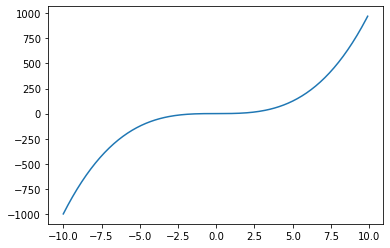

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
y = x**3
plt.plot(x,y)
plt.show()

#### Algoritmo de Adams

El algoritmo de Adams (Adaptive Moment Estimation) aplica el concepto de momento no solo al gradiente en sí sino tambien a la tase a prendizaje. Es decir, se trata de utilizar dos momentos: 
1. Uno para calcular el valor de gradiente de cada coeficiente de manera similar a gradiente + momemto.
2. Otro para actualizar el valor de la tasa de aprendizaje.

[**Para más información teórica acerca del algoritmo de Adams, recomiendo leer este artículo**](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
